<a href="https://colab.research.google.com/github/mdzikrim/Hands-on_DL/blob/main/Chapter_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train.astype("float32") / 255.0, X_test.astype("float32") / 255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# Tambah noise
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * tf.random.normal(shape=X_train.shape)
X_test_noisy = X_test + noise_factor * tf.random.normal(shape=X_test.shape)
X_train_noisy = tf.clip_by_value(X_train_noisy, 0., 1.)
X_test_noisy = tf.clip_by_value(X_test_noisy, 0., 1.)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def build_dae():
    encoder = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D()
    ])

    decoder = models.Sequential([
        layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same'),
        layers.Conv2D(1, 3, activation='sigmoid', padding='same')
    ])

    model = models.Sequential([encoder, decoder])
    return model, encoder

dae, encoder = build_dae()
dae.compile(optimizer="adam", loss="mse")
dae.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 7, 7, 64)       │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │        55,681 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
dae.fit(X_train_noisy, X_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 137s 318ms/step - loss: 0.1227 - val_loss: 0.1114
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 140s 315ms/step - loss: 0.1122 - val_loss: 0.1114
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 133s 315ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 148s 330ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 331ms/step - loss: 0.1120 - val_loss: 0.1114
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 328ms/step - loss: 0.1123 - val_loss: 0.1114
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 330ms/step - loss: 0.1118 - val_loss: 0.1114
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 135s 320ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 134s 318ms/step - loss: 0.1120 - val_loss: 0.1114
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 137s 324ms/step - loss: 0.1122 - val_loss: 0.1114


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


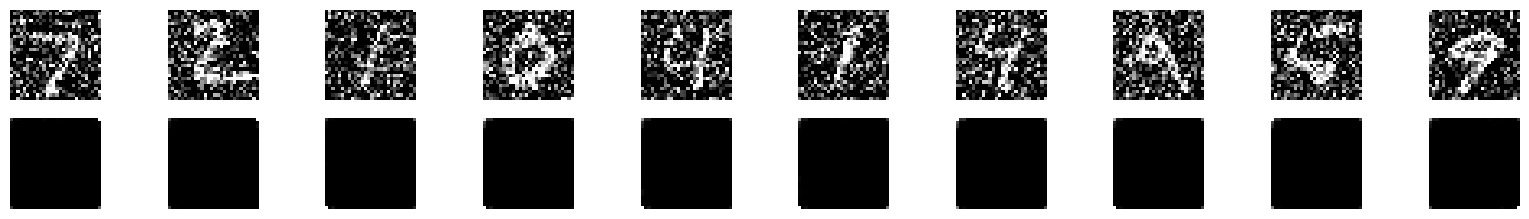

In [5]:
import matplotlib.pyplot as plt

decoded_imgs = dae.predict(X_test_noisy[:10])

plt.figure(figsize=(20, 4))
for i in range(10):
    # input
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(X_test_noisy[i].numpy().reshape(28, 28), cmap="gray")
    plt.axis("off")
    # output
    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

In [7]:
from tensorflow.keras.datasets import mnist

(_, _), (X_test_cls, y_test_cls) = mnist.load_data()
X_test_cls = X_test_cls.astype("float32") / 255.0
X_test_cls = X_test_cls[..., tf.newaxis]

# Fix: Load training labels instead of training images for y_train_cls
(X_train_cls_full, y_train_cls_full), (_, _) = mnist.load_data()
X_train_cls = X_train_cls_full[:500].astype("float32") / 255.0
X_train_cls = X_train_cls[..., tf.newaxis]
y_train_cls = y_train_cls_full[:500]


# Ambil encoder output
X_train_encoded = encoder.predict(X_train_cls)
X_test_encoded = encoder.predict(X_test_cls)

clf = models.Sequential([
    layers.Flatten(input_shape=X_train_encoded.shape[1:]),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
clf.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
clf.fit(X_train_encoded, y_train_cls, epochs=10, validation_split=0.2)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3052 - loss: 2.1195 - val_accuracy: 0.5000 - val_loss: 1.5073
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6033 - loss: 1.3058 - val_accuracy: 0.6600 - val_loss: 1.0957
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7237 - loss: 0.9926 - val_accuracy: 0.7000 - val_loss: 1.0363
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7975 - loss: 0.8240 - val_accuracy: 0.7300 - val_loss: 0.9412
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7839 - loss: 0.7107 - val_accuracy: 0.7600 - val_loss: 0.9038
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8248 - loss: 0.6816 - val_accuracy: 0.7500 - val_loss: 0.8432
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8189 - loss: 0.5951 - val_accuracy: 0.7800 - val_loss: 0.7835
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8195 - loss: 0.5954 - val_accuracy: 0.6900 - val_loss: 0.